In [1]:
# Load packages

import numpy as np
import matplotlib.pylab as pl
import copy
%matplotlib inline
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 600.



np.random.seed = 1234 #random seed for reproducibility  


# Asimple Agent Based Model Example
by Nicholas Skar-Gislinge

## Introduction

This is a simple demonstration and code example of agent based modelling. It is inspired by the famous Schelling’s model of segregation. An online version may be found here https://notebooks.azure.com/mesalas/libraries/ABMNicholas (note that the plots may differ in the online version)

## Model Functions
The model consists of a map and a number of agents. The map is represented by a grid and on each point on the grid lives one of the agents. The agents can either be of type A or B.
The map is generated and the agents are placed on it using the InitMap function.


In [2]:
def InitMap(Number = 50, Shape = (10,10), Shuffel = True):
    '''Fuction for generating the map and placing the agents.
    
       Number : the number of agents of type B
    
       Shape  : the shape of the map. default is 10x10.
                the total number of agents is given by 
                multiplyingthe dimensions of the map.
       Shuffe : Distributes the B type agents randomly on the map  
    '''
    Agents = Shape[0]*Shape[1] #Calculate number of agents
    Map = np.zeros(Agents, dtype = int) # make map of A type agents

    for i in range(Number): #Loop for placing the b type agents
        Map[i] = 1 # add agent of B type

    if Shuffel == True: # Do we shuffle the map?
        np.random.shuffle(Map) # Shuffle map
    Map = np.reshape(Map,Shape) # Shape map into the given sghape
    return Map
                 

Below we generate a map and place the agents. The figure shows the generated map with the agents of type B in yellow.

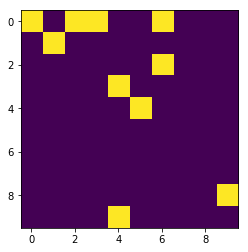

In [3]:
Map = InitMap(Number=10, Shape=(10,10)) #Make map

# Code for plotting
fig,ax = pl.subplots()
pl.imshow(Map);


The agents prefer their neighbours to be of the same kind as themselves. To check if this is the case we create the two functions, `Neighbours` and Happy, shown below `Neighbours` find the eight nearest neighbours to a given point on the map, and Happy uses `Neighbours` to check if the agent at the given point is surrounded 6 (This value is chosen somewhat arbitrarily and will be considered further down) or more agents of the same type. If it is the agent is considered happy.

In [4]:
def Neighbours(pos,Map):
    """Fuction finding the nearest neighbours to a point on a grid.
       Note that the grid is considered periodic.
    
       pos : position
       Map : gird
    """
    Shape = Map.shape #Size of the map
    j = pos[1] #first index of the position 
    i = pos[0] #second index of the position
    
    #First indexes of the eight nearst neighbours
    NeighbourJ = [j - 1, j    , j +1 ,
                  j - 1 ,       j +1,
                  j - 1, j    , j +1
                 ]
    
    #Second indexes of the eight nearst neighbours
    NeighbourI = [i - 1, i - 1, i - 1,
                  i,             i,
                  i + 1, i + 1, i + 1
                 ]
    # We need to take into account that the edges are considered neighbours 
    for i,j in enumerate(NeighbourJ): # loop through the neighbours second indexes
        if j > Shape[1] -1: # if the second index is over the right edge 
            NeighbourJ[i] = 0 # change the second index to left edge
        if j < 0: # if the second index is over the left edge
            NeighbourJ[i] = Shape[1] - 1 # change the second index to right edge
    for i,j in enumerate(NeighbourI): # loop through the neighbours first indexes
        if j > Shape[0] -1: # if the first index is over the botom edge
            NeighbourI[i] = 0 # change the first index to the top edge
        if j < 0: # if the first index is over the top edge
            NeighbourI[i] = Shape[0]-1 # change the first index to the botom edge
    return np.array(zip(NeighbourI,NeighbourJ)) # return the neighbours

def Happy(pos, Map, Type, NoLikeForHappy = 6):
    '''Function assessing the state of an agent at pos on the map.
    if the agent is surrounded by more than NoLikeForHappy agents it is considered happy'''
    
    IsHappy = False # We start out assuming that the agent is unhappy
    Type = Map[pos[0],pos[1]] # get the type of the agent
    NN = Neighbours(pos,Map) # Find the heighbours
    
    score = 0 # counter for scoring
    for i,j in NN: # loop over the neighbours 
        if Map[i,j] == Type: # check if the neighbour is of the same type
            score = score + 1 # add to score
    if score >= NoLikeForHappy: # check of the total score is more or equal to NoLikeForHappy
        IsHappy = True # set Happy state to true

    return (IsHappy,score) # return the state and score 


In the plot below, the `Happy` and `Neighbours` functions are used to find the nearest neighbours and assess the Happiness of three agents on the Map. The agent is indicated by a triangle (pointing upwards if happy and downwards if unhappy). The points indicate the neighbours.

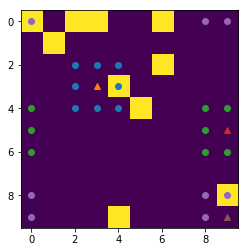

In [5]:
# Code for plotting
fig,ax = pl.subplots()
pl.imshow(Map)
pos = (3,3)
NN = Neighbours(pos,Map)
ax.plot(NN[:,1],NN[:,0],'o')
(IsHappy,score) = Happy(pos, Map, Map[pos[0],pos[1]])
if IsHappy == True:
    Marker = '^'
if IsHappy == False:
    Marker = 'v'
ax.plot(pos[1],pos[0], Marker)

pos = (5,9)
NN = Neighbours(pos,Map)
pl.plot(NN[:,1],NN[:,0],'o')
(IsHappy,score) = Happy(pos, Map, Map[pos[0],pos[1]])
if IsHappy == True:
    Marker = '^'
if IsHappy == False:
    Marker = 'v'
ax.plot(pos[1],pos[0], Marker)

pos = (9,9)
NN = Neighbours(pos,Map)
pl.plot(NN[:,1],NN[:,0],'o')
(IsHappy,score) = Happy(pos, Map, Map[pos[0],pos[1]])
if IsHappy == True:
    Marker = '^'
if IsHappy == False:
    Marker = 'v'
ax.plot(pos[1],pos[0], Marker)

We now construct a function for identifying all agents that a considered unhappy. In the figure below we use the function to plot the unhappy agents on the map. Unhappy agents of A type are shown as circles and unhappy agents of B type are shown as squares. 

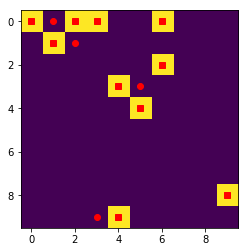

In [6]:
def MakeMarked(Map):
    '''Function for identifying all unhappy agents on the map.
       It returns a list of the unhappy agents of type A and 
       one of the unhappy agents of type B
       '''
    WillSellA = [] # List of unhappy A type agents
    WillSellB = [] # List of unhappy B type agents
    Shape = Map.shape # get the shape of map
    for i in range(Shape[0]): #Loop over first index on the map
        for j in range(Shape[1]): #Loop over second index on the map
            AreWeHappy = Happy((i,j),Map,Map[i,j]) # Check if the current agent is happy
            if AreWeHappy[0] == False: # is the current agent unhappy? 
                if Map[i,j] == 0: # is the current agent of type A?
                    WillSellA.append([(i,j),Map[i,j]]) # append it to the list of unhappy A type agents
                if Map[i,j] == 1: # is the current agent of type B?
                    WillSellB.append([(i,j),Map[i,j]]) # append it to the list of unhappy B type agents
    return WillSellA,WillSellB #return the lists

MarkedA, MarkedB = MakeMarked(Map) # Find the unhappy agents on the map

# Code for plotting the unhappy agents
fig,ax = pl.subplots()
pl.imshow(Map)
for i in MarkedA:
    ax.plot(i[0][1],i[0][0], 'o', color = 'red')
for i in MarkedB:
    ax.plot(i[0][1],i[0][0], 's', color = 'red')

Now that the unhappy agents are found, they are allowed to trade places. This happens in the `Trade` function. The function picks a random unhappy agent of the A type, and switches place with an agent of the B type, also chosen at random.

In [7]:
def Trade(MarkedA,MarkedB):
    '''Function for switching place of a random unhappy
       agent of type A, with a random unhappy agent of type B
       
    '''
    np.random.shuffle(MarkedA) # Shuffle list of unhappy A agents
    np.random.shuffle(MarkedB) # Shuffle list of unhappy B agents
    L = MarkedA[0] # Pick first agent in (shuffled) list of unhappy A type agents 
    M = MarkedB[0] # Pick first agent in (shuffled) list of unhappy B type agents 
    Map[L[0][0],L[0][1]] = M[1] # Switch place 
    Map[M[0][0],M[0][1]] = L[1] # Switch place 

## A Small Test Run
Using the functions above, we can now create a map with agents and let them trade places. Below the initial map is shown as well as after 500 turns of switching places. Here it is clearly seen that the B type agents aggregate.

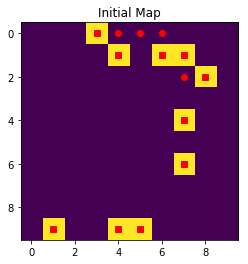

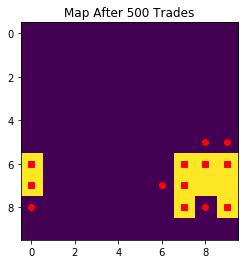

In [8]:
from matplotlib.animation import FuncAnimation

    
    

Map = InitMap(Number=10, Shape=(10,10)) # Initialize map and place agents
MarkedA, MarkedB = MakeMarked(Map) # Find unhappy agents

#code for plotting
fig,ax = pl.subplots()
ax.set_title('Initial Map')

pl.imshow(Map)
for i in MarkedA:
    ax.plot(i[0][1],i[0][0], 'o', color = 'red')
for i in MarkedB:
    ax.plot(i[0][1],i[0][0], 's', color = 'red')

# Loop for tradinf
for i in range(500):
    Trade(MarkedA,MarkedB) # Switch place of two agents
    MarkedA, MarkedB = MakeMarked(Map) # make new lists of unhappy agents

# Code for plotting    
fig,ax = pl.subplots()
pl.imshow(Map)
ax.set_title('Map After 500 Trades')
for i in MarkedA:
    ax.plot(i[0][1],i[0][0], 'o', color = 'red')
for i in MarkedB:
    ax.plot(i[0][1],i[0][0], 's', color = 'red')

## A Larger Test Run

We now try a larger map with 10000 agents and 10% B type agents. Below we show the initial map, the map after 1000 moves and after 2000 moves. here we clearly see how the agents start to segregate as we allow them to switch places. An animation of a similar run has been saved here https://www.dropbox.com/s/og8p0z2r1ei9xkl/LargeRun.mp4?dl=0 

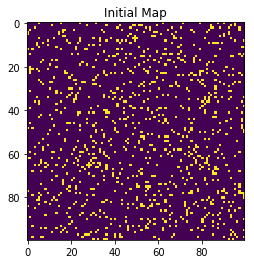

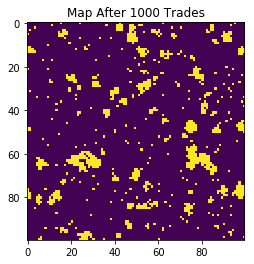

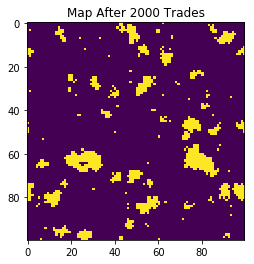

In [9]:
## Note this section might take some time to run
Map = InitMap(Number=1000, Shape=(100,100)) #Initialize map

#Code for plotting
fig,ax = pl.subplots()
ax.set_title('Initial Map')
pl.imshow(Map)

LenMarkedA = [] # List for storing number unhappy A type agents
LenMarkedB = [] # List for storing number unhappy B type agents 
for i in range(1000): # Make 1000 moves 
    MarkedA, MarkedB = MakeMarked(Map) # make lists of unhappy A and B type agents
    LenMarkedA.append(len(MarkedA)) # get number of unhappy A type agents
    LenMarkedB.append(len(MarkedB)) # get number of unhappy B type agents
    if len(MarkedA) > 0: # Check that that there are A type agents that want to switch place 
        if len(MarkedB) > 0: # Check that that there are B type agents that want to switch place 
            Trade(MarkedA,MarkedB) # Make switch
            

# Code for plotting
fig,ax = pl.subplots()
pl.imshow(Map)
ax.set_title('Map After 1000 Trades')

for i in range(1000): # Make 1000 moves 
    MarkedA, MarkedB = MakeMarked(Map) # make lists of unhappy A and B type agents
    LenMarkedA.append(len(MarkedA)) # get number of unhappy A type agents
    LenMarkedB.append(len(MarkedB)) # get number of unhappy B type agents
    if len(MarkedA) > 0: # Check that that there are A type agents that want to switch place 
        if len(MarkedB) > 0: # Check that that there are B type agents that want to switch place 
            Trade(MarkedA,MarkedB) # Make switch
            

# Code for plotting
fig,ax = pl.subplots()
pl.imshow(Map)
ax.set_title('Map After 2000 Trades')

Below we plot the number of unhappy agents as we allow them to move around. Here we can observe how the total number of unhappy agents drop as the agents segregate.

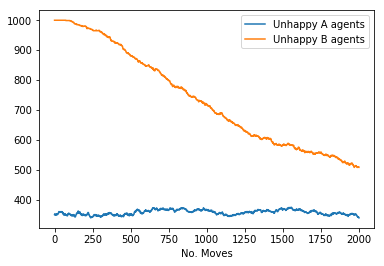

In [10]:
fig,ax  = pl.subplots()
ax.plot(LenMarkedA, label = 'Unhappy A agents')
ax.plot(LenMarkedB, label = 'Unhappy B agents')
ax.set_xlabel('No. Moves')
ax.legend()

## Conclusions

We have assumed that the two types of agents prefer to live next to agents of the same type. If we accept this assumption and we allow the agents to trade place, we can use the ABM to show that this leads to segregation of the two types of agents over time. Here we have chosen to consider an agent unhappy if it has less than 6 agents of the same type as neighbours. This is chosen for demonstration purpose. If it is less there will be very few unhappy A type agents to trade places which may freeze the current model, and if it is larger there will be to many unhappy agents and it will be very improbable that an agent moves to a place that is happy. All this depends on the ratio of the agents and the size of the map. 

An important question to ask ourselves is; Is this model realistic? That really depends on what we want to model. If this was the development of a housing marked, the fact that one unhappy agent can only trade with a random unhappy agent of the other kind, it is highly unrealistic. Normally, when you are in the marked for a new house, you are not assigned a one at random.
However, the model describes the segregation resulting of the assumption that the agents prefer to be next to agents of the same kind.    

## Apendix

Animation of a large run. below is the code for generating the animation linked above.

In [ ]:
# This may take a long time to run
def Update(num,Map,img):
    MarkedA, MarkedB = MakeMarked(Map) # make new lists of unhappy agents
    Trade(MarkedA,MarkedB) # Switch place of two agents
    img.set_array(Map)
    return img,
    
fig = pl.figure()
Map = InitMap(Number=300, Shape=(100,100)) # Initialize map and place agents
img = pl.imshow(Map, animated = True)
ani = FuncAnimation(fig, Update, fargs=(Map, img), frames = 2000,
                                   interval=10, blit=True)
ani.save('LargeRun.mp4',dpi=144)


Link and embed
https://www.dropbox.com/s/og8p0z2r1ei9xkl/LargeRun.mp4?dl=0

<video controls src="https://www.dropbox.com/s/og8p0z2r1ei9xkl/LargeRun.mp4?dl=1" />
